# K-Nearest Neighbors

En este script de Python veremos como implementar en código todo lo que vimos ya conceptualmente. Python tiene muchas funciones que nos facilitan la vida, y por eso es importante saber qué es lo que está haciendo la computadora cuando hacemos código, y no sólo escribir código a lo tonto.

### Paso 1: Importamos las principales bibliotecas que vamos a utilizar en la sesión.
Abrá otras que importareamos después según vayamos requiriendo las funciones

In [ ]:
import numpy as np # Numeric Python, me deja manipular facilmente arreglos y listas numéricos
import pandas as pd # Pandas es la principal biblioteca de manejo de bases de datos en Python
import matplotlib.pyplot as plt # Este es para hacer grafiquitas
import seaborn as sns # Está basado en matplotlib, y hace gráficas más bonitas más fácil.

%matplotlib inline

### Paso 2: descargo e importo la base de datos

In [ ]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
iris = pd.read_csv(url)
iris.shape

(150, 5)

In [ ]:
iris.head()
iris['species'].nunique()

iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

Imaginémonos que nuestro KNN va a clasificar con base en dos atributos nada más. ¿Qué vemos en la gráfica? Los azules todo bien pero, ¿es clara la "diferencia" entre naranjas y verdes? ¿Cómo lo podríamos solucionar?


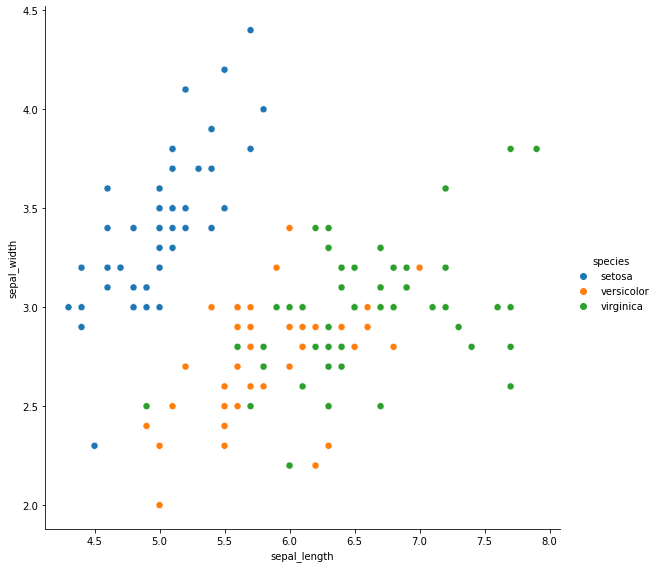

In [ ]:
sns.pairplot(x_vars = 'sepal_length', y_vars = 'sepal_width', hue = 'species', 
             plot_kws={"s": 50}, height = 8, data = iris)

### Paso 3: Separo mi base en atributos (variables independientes, si quieren verlo así) y etiquetas (variable dependiente)

In [ ]:
# Set de características
x = iris.iloc[:, :4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Columna de respuestas
y = iris.iloc[:, 4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

#¿Knearest ?

![knearest](https://miro.medium.com/max/1022/1*AuXDgGrr0wbCoF6KDXXSZQ.jpeg)


El algoritmo k-nearest neighbors (KNN) es un algoritmo de aprendizaje automático simple y supervisado que puede utilizarse para resolver tanto problemas de clasificación como de regresión. Es fácil de implementar y entender, pero tiene el gran inconveniente de volverse significativamente lento a medida que crece el tamaño de los datos en uso.
KNN funciona encontrando las distancias entre una consulta y todos los ejemplos de los datos, seleccionando el número especificado de ejemplos (K) más cercanos a la consulta, y luego vota por la etiqueta más frecuente (en el caso de la clasificación) o promedia las etiquetas (en el caso de la regresión).
En el caso de la clasificación y la regresión, la elección de la K correcta para nuestros datos se realiza probando varias K y eligiendo la que mejor funciona.


En la clasificación k-NN, el resultado es la pertenencia a una clase. Un objeto se clasifica mediante un voto plural de sus vecinos, asignando el objeto a la clase más común entre sus k vecinos más cercanos (k es un número entero positivo, normalmente pequeño). Si k = 1, el objeto se asigna simplemente a la clase de ese único vecino más cercano.

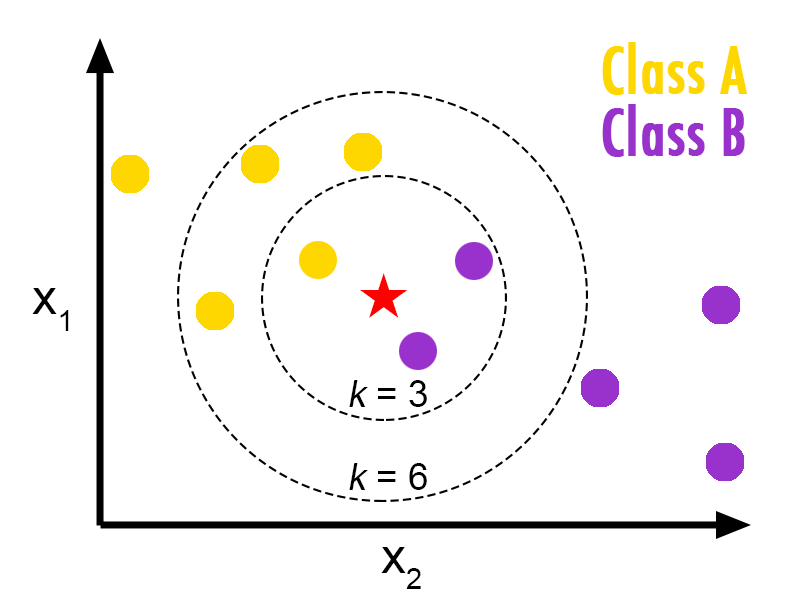

![formula_deuclidea](https://www.delftstack.com/img/Math/euclidean%20distance.png?ezimgfmt=rs:350x121/rscb5/ng:webp/ngcb5)

![tomato](https://jiayiwangjw.github.io/img/KNN/tomato.png)

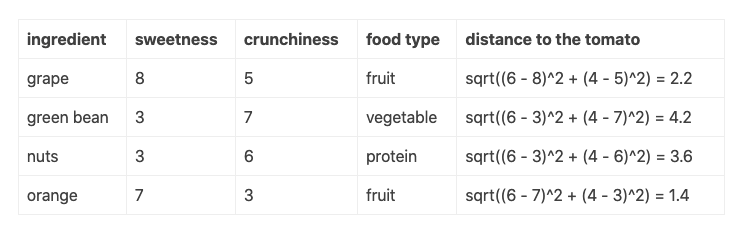

### Paso 4: Vamos a dividir nuestra base en una base de entrenamiento y otra de prueba. Dejemos 80% para que el KNN memorice, y 20% para ver qué tan bien "aprendió" a clasificar

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True,test_size = 0.20)

In [ ]:
print(len(iris))
print(len(x_train))

150
120


En teoría, una buena K para empezar a explorar es la raíz cuadrada del número de observaciones de mi base de entrenamiento. En este caso es la raíz de 120, es decir, 11 aproximadamente.

![good_k](https://jiayiwangjw.github.io/img/KNN/how%20much%20is%20K.png)

In [ ]:
import math
math.sqrt(120)

10.954451150103322

### Paso 5: Normalizo mis datos para que tengan una escala común

Primero importo la función que me permite normalizar facilmente, y luego le digo que calcule media y desviación que va a usar luego para normalizar (en la parte del fit).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

Ahora sí, re-escalo mis variables

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[0.16666667, 0.45833333, 0.0877193 , 0.        ],
       [0.11111111, 0.5       , 0.10526316, 0.04166667],
       [0.41666667, 0.25      , 0.52631579, 0.45833333],
       [0.36111111, 0.20833333, 0.50877193, 0.41666667],
       [0.80555556, 0.41666667, 0.84210526, 0.625     ],
       [0.58333333, 0.5       , 0.75438596, 0.91666667],
       [0.22222222, 0.54166667, 0.12280702, 0.16666667],
       [0.36111111, 0.41666667, 0.61403509, 0.58333333],
       [0.38888889, 0.33333333, 0.61403509, 0.5       ],
       [0.58333333, 0.5       , 0.61403509, 0.58333333],
       [0.94444444, 0.41666667, 0.89473684, 0.91666667],
       [0.02777778, 0.375     , 0.07017544, 0.04166667],
       [0.38888889, 0.41666667, 0.56140351, 0.45833333],
       [0.30555556, 0.41666667, 0.61403509, 0.58333333],
       [0.13888889, 0.41666667, 0.07017544, 0.        ],
       [0.72222222, 0.5       , 0.8245614 , 0.91666667],
       [0.47222222, 0.41666667, 0.66666667, 0.70833333],
       [0.61111111, 0.41666667,

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

### Paso 6: Importo mi clasificador y le digo que memorice los datos de entrenamiento 

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

### Paso 7: Hago la predicción con mis atributos del set de prueba

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

### Paso 8: revisamos qué tan bien lo hicimos

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**EXTRA: podemos ver con nuestro set de prueba el número de errores promedio que tendríamos con distintas K's

In [ ]:
error = []
for i in range(1, 119):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
error
    

[0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.13333333333333333,
 0.1,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.43333333333333335,
 0

(0.0, 1.0)

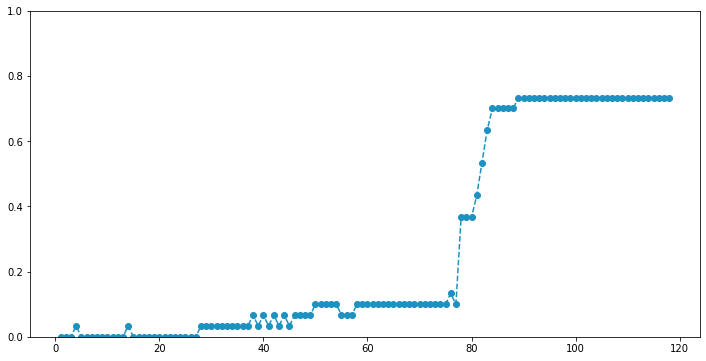

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 119), error, color = '#1d91c0', linestyle = 'dashed', marker = 'o')
plt.ylim(0, 1.0)